# Curvas de coronavirus - Comparação Brasil e alguns países do mundo

## Link ##

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide?fbclid=IwAR349UqPdhIujQOAwhnj9BrKBHMlhUjS0LRm0mN1nBeZjG-cYH3ROi6ific

In [0]:
#hide
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(1)
import seaborn as sns
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('bright')
import pandas as pd
from datetime import date
import io


In [0]:
#hide
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#hide
# Abrir pasta com os arquivos
%cd "/content/drive/My Drive/CoronaVirus Brasil"

/content/drive/My Drive/CoronaVirus Brasil


In [0]:
#hide
# Visualizar arquivos locais
ls

brasil-io-dados-estado.ipynb  caso.csv.gz    Corona_mundo.ipynb  plots/
Brasil.ipynb                  caso.csv.gz.1  dados.csv
caso.csv                      caso.csv.gz.2  graficovid/


In [0]:
#URL = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"

#requests.get(URL)

In [0]:
!rm dados.csv

In [0]:
!wget https://opendata.ecdc.europa.eu/covid19/casedistribution/csv -O dados.csv

--2020-03-28 21:50:34--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv
Resolving opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)... 212.181.0.63
Connecting to opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)|212.181.0.63|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/ [following]
--2020-03-28 21:50:35--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/
Reusing existing connection to opendata.ecdc.europa.eu:443.
HTTP request sent, awaiting response... 200 OK
Length: 375360 (367K) [application/octet-stream]
Saving to: ‘dados.csv’

dados.csv           100%[===================>] 366.56K   451KB/s    in 0.8s    

2020-03-28 21:50:35 (451 KB/s) - ‘dados.csv’ saved [375360/375360]



### Dia

In [0]:
#hide
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us

'2020-03-28'

In [0]:
#hide

#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)

In [0]:
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

In [0]:
#hide
data = pd.read_csv('dados.csv', encoding='latin-1')
data.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
7315,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
7316,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
7317,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
7318,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
7319,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [0]:
#hide
data2 = data[data['countriesAndTerritories'].isin(['Brazil','Italy','United_States_of_America','France','South_Korea', 'Japan','United_Kingdom','China','Spain','Argentina','India','Mexico','Germany','Czech_Republic'])]


In [0]:
#hide
data3 = data2[['dateRep','cases','countriesAndTerritories']]

In [0]:
#hide 
#por 10 mil
pop_br = 20930
pop_it = 60590
pop_eua = 32570
pop_uk = 66040
pop_sk = 51470
pop_fr = 66770
pop_jp = 12680
pop_esp = 46530
pop_ar = 44270
pop_mex = 12920
pop_ind = 133900
pop_ger = 82520
pop_rc = 10641

### Dados dos países individualmente###

In [0]:
#hide
germany = data3[data3['countriesAndTerritories']=='Germany']
germany.sort_index(ascending=False,inplace=True)
germany['Cumulativo'] = germany['cases'].cumsum()
germany['Relativo'] = germany['Cumulativo']/pop_ger
germany = germany[germany['Cumulativo']>=50]
germany.reset_index(drop=True, inplace=True)
germany.drop(['cases','dateRep'],axis=1,inplace=True)
germany.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
24,Germany,29212,0.353999
25,Germany,31554,0.382380
26,Germany,36508,0.442414
27,Germany,42288,0.512458
28,Germany,48582,0.588730


In [0]:
#hide
italy = data3[data3['countriesAndTerritories']=='Italy']
italy.sort_index(ascending=False,inplace=True)
italy['Cumulativo'] = italy['cases'].cumsum()
italy['Relativo'] = italy['Cumulativo']/pop_it
italy = italy[italy['Cumulativo']>=50]
italy.reset_index(drop=True, inplace=True)
italy.drop(['cases','dateRep'],axis=1,inplace=True)

italy.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
30,Italy,63927,1.055075
31,Italy,69176,1.141707
32,Italy,74386,1.227694
33,Italy,80539,1.329246
34,Italy,86498,1.427595


In [0]:
#hide
brazil = data3[data3['countriesAndTerritories']=='Brazil']
brazil.sort_index(ascending=False,inplace=True)
brazil['Cumulativo'] = brazil['cases'].cumsum()
brazil['Relativo'] = brazil['Cumulativo']/pop_br
brazil = brazil[brazil['Cumulativo']>=50]
brazil.reset_index(drop=True, inplace=True)
brazil.drop(['cases','dateRep'],axis=1,inplace=True)
brazil.tail(5)


brazil


,countriesAndTerritories,Cumulativo,Relativo
0,Brazil,52,0.002484
1,Brazil,77,0.003679
2,Brazil,98,0.004682
3,Brazil,121,0.005781
4,Brazil,200,0.009556
5,Brazil,234,0.011180
6,Brazil,291,0.013903
7,Brazil,428,0.020449
8,Brazil,621,0.029670
9,Brazil,904,0.043192


In [0]:
#hide
argentina = data3[data3['countriesAndTerritories']=='Argentina']
argentina.sort_index(ascending=False,inplace=True)
argentina['Cumulativo'] = argentina['cases'].cumsum()
argentina['Relativo'] = argentina['Cumulativo']/pop_ar
argentina = argentina[argentina['Cumulativo']>=50]
argentina.reset_index(drop=True, inplace=True)
argentina.drop(['cases','dateRep'],axis=1,inplace=True)
argentina.head(5)

,countriesAndTerritories,Cumulativo,Relativo
0,Argentina,56,0.001265
1,Argentina,65,0.001468
2,Argentina,79,0.001785
3,Argentina,97,0.002191
4,Argentina,128,0.002891


In [0]:
#hide
japan = data3[data3['countriesAndTerritories']=='Japan']
japan.sort_index(ascending=False,inplace=True)
japan['Cumulativo'] = japan['cases'].cumsum()
japan['Relativo'] = japan['Cumulativo']/pop_jp
japan = japan[japan['Cumulativo']>=50]
japan.reset_index(drop=True, inplace=True)
japan.drop(['cases','dateRep'],axis=1,inplace=True)
japan.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
37,Japan,1128,0.088959
38,Japan,1193,0.094085
39,Japan,1268,0.100000
40,Japan,1364,0.107571
41,Japan,1499,0.118218


In [0]:
#hide
france = data3[data3['countriesAndTerritories']=='France']
france.sort_index(ascending=False,inplace=True)
france['Cumulativo'] = france['cases'].cumsum()
france['Relativo'] = france['Cumulativo']/pop_fr
france = france[france['Cumulativo']>=50]
france.reset_index(drop=True, inplace=True)
france.drop(['cases','dateRep'],axis=1,inplace=True)
france.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
24,France,19856,0.297379
25,France,22302,0.334012
26,France,25233,0.377909
27,France,29155,0.436648
28,France,32964,0.493695


In [0]:
#hide
south_korea = data3[data3['countriesAndTerritories']=='South_Korea']
south_korea.sort_index(ascending=False,inplace=True)
south_korea['Cumulativo'] = south_korea['cases'].cumsum()
south_korea['Relativo'] = south_korea['Cumulativo']/pop_sk
south_korea = south_korea[south_korea['Cumulativo']>=50]
south_korea.reset_index(drop=True, inplace=True)
south_korea.drop(['cases','dateRep'],axis=1,inplace=True)
south_korea.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
33,South_Korea,9037,0.175578
34,South_Korea,9137,0.177521
35,South_Korea,9241,0.179541
36,South_Korea,9332,0.181310
37,South_Korea,9478,0.184146


In [0]:
#hide
us = data3[data3['countriesAndTerritories']=='United_States_of_America']
us.sort_index(ascending=False,inplace=True)
us['Cumulativo'] = us['cases'].cumsum()
us['Relativo'] = us['Cumulativo']/pop_eua
us = us[us['Cumulativo']>=50]
us.reset_index(drop=True, inplace=True)
us.drop(['cases','dateRep'],axis=1,inplace=True)
us.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
28,United_States_of_America,46442,1.425913
29,United_States_of_America,55231,1.695763
30,United_States_of_America,69194,2.124470
31,United_States_of_America,85991,2.640190
32,United_States_of_America,104686,3.214185


In [0]:
#hide
uk = data3[data3['countriesAndTerritories']=='United_Kingdom']
uk.sort_index(ascending=False,inplace=True)
uk['Cumulativo'] = uk['cases'].cumsum()
uk['Relativo'] = uk['Cumulativo']/pop_uk
uk = uk[uk['Cumulativo']>=50]
uk.reset_index(drop=True, inplace=True)
uk.drop(['cases','dateRep'],axis=1,inplace=True)
uk.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
20,United_Kingdom,6650,0.100697
21,United_Kingdom,8077,0.122305
22,United_Kingdom,9529,0.144291
23,United_Kingdom,11658,0.176529
24,United_Kingdom,14543,0.220215


In [0]:
#hide
spain = data3[data3['countriesAndTerritories']=='Spain']
spain.sort_index(ascending=False,inplace=True)
spain['Cumulativo'] = spain['cases'].cumsum()
spain['Relativo'] = spain['Cumulativo']/pop_esp
spain = spain[spain['Cumulativo']>=50]
spain.reset_index(drop=True, inplace=True)
spain.drop(['cases','dateRep'],axis=1,inplace=True)
spain.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
23,Spain,33089,0.711133
24,Spain,39673,0.852633
25,Spain,47610,1.023211
26,Spain,56188,1.207565
27,Spain,64059,1.376725


In [0]:
#hide
mexico = data3[data3['countriesAndTerritories']=='Mexico']
mexico.sort_index(ascending=False,inplace=True)
mexico['Cumulativo'] = mexico['cases'].cumsum()
mexico['Relativo'] = mexico['Cumulativo']/pop_esp
mexico = mexico[mexico['Cumulativo']>=50]
mexico.reset_index(drop=True, inplace=True)
mexico.drop(['cases','dateRep'],axis=1,inplace=True)
mexico.tail(5)

,countriesAndTerritories,Cumulativo,Relativo
8,Mexico,367,0.007887
9,Mexico,405,0.008704
10,Mexico,475,0.010208
11,Mexico,585,0.012573
12,Mexico,717,0.015409


In [0]:
#hide
india = data3[data3['countriesAndTerritories']=='India']
india.sort_index(ascending=False,inplace=True)
india['Cumulativo'] = india['cases'].cumsum()
india['Relativo'] = india['Cumulativo']/pop_ind
india = india[india['Cumulativo']>=50]
india.reset_index(drop=True, inplace=True)
india.drop(['cases','dateRep'],axis=1,inplace=True)
india.tail(5)


,countriesAndTerritories,Cumulativo,Relativo
13,India,492,0.003674
14,India,562,0.004197
15,India,649,0.004847
16,India,724,0.005407
17,India,873,0.006520


In [0]:
#hide
czech_Republic = data3[data3['countriesAndTerritories']=='Czech_Republic']
czech_Republic.sort_index(ascending=False,inplace=True)
czech_Republic['Cumulativo'] = czech_Republic['cases'].cumsum()
czech_Republic['Relativo'] = czech_Republic['Cumulativo']/pop_rc
czech_Republic = czech_Republic[czech_Republic['Cumulativo']>=50]
czech_Republic.reset_index(drop=True, inplace=True)
czech_Republic.drop(['cases','dateRep'],axis=1,inplace=True)
czech_Republic.tail(5)


,countriesAndTerritories,Cumulativo,Relativo
13,Czech_Republic,1236,0.116154
14,Czech_Republic,1394,0.131003
15,Czech_Republic,1654,0.155437
16,Czech_Republic,2062,0.193779
17,Czech_Republic,2279,0.214172


### Tabela final ###

In [0]:
#hide
final_data=pd.concat([brazil,italy,japan,uk,us,france,south_korea,spain,argentina,india,mexico,germany,czech_Republic],axis=0)
final_data['Dias']=final_data.index
final_data.columns = ['Países e territórios','Casos acumulados','Relativa','Dias desde o caso número 50']
final_data.tail(5)


,Países e territórios,Casos acumulados,Relativa,Dias desde o caso número 50
13,Czech_Republic,1236,0.116154,13
14,Czech_Republic,1394,0.131003,14
15,Czech_Republic,1654,0.155437,15
16,Czech_Republic,2062,0.193779,16
17,Czech_Republic,2279,0.214172,17


## Adicionando percentual 

In [0]:
#hide
brazil_dupl = brazil
brazil_dupl['razao']= brazil_dupl['Cumulativo'].pct_change()
brazil_dupl['razao']=(brazil_dupl['razao']*100).round(2)
brazil_dupl['dias']= brazil_dupl.index
brazil_dupl.tail(5)


,countriesAndTerritories,Cumulativo,Relativo,razao,dias
12,Brazil,1891,0.090349,22.32,12
13,Brazil,2201,0.105160,16.39,13
14,Brazil,2433,0.116245,10.54,14
15,Brazil,2915,0.139274,19.81,15
16,Brazil,3417,0.163258,17.22,16


In [0]:
#hide
zoom = final_data[final_data['Casos acumulados']<=2500]

## Gráficos de contaminação

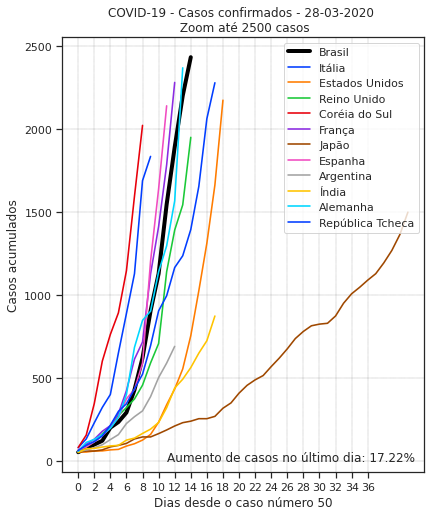

In [0]:
#hide
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')


razao = brazil_dupl['razao'].values[-1]
texto = 'Aumento de casos no último dia: '+ str(razao)+'%'
plt.text(11, 0,texto,fontsize=12)
plt.grid(color='black', linestyle='--', linewidth=0.17)

plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Casos confirmados - {} \n Zoom até 2500 casos'.format(today))

plt.savefig("plots/01_corona_zoom.png")


In [0]:
meio_zoom = final_data[final_data['Casos acumulados']<=5000]

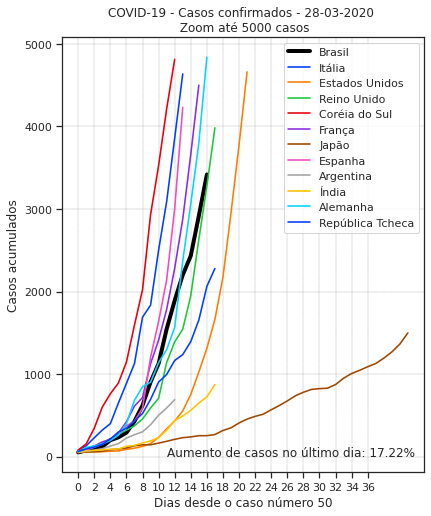

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')

plt.grid(color='black', linestyle='--', linewidth=0.17)

plt.text(11,0,texto,fontsize=12)
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Casos confirmados - {} \n Zoom até 5000 casos'.format(today))
plt.savefig("plots/02_corona_meio_zoom")

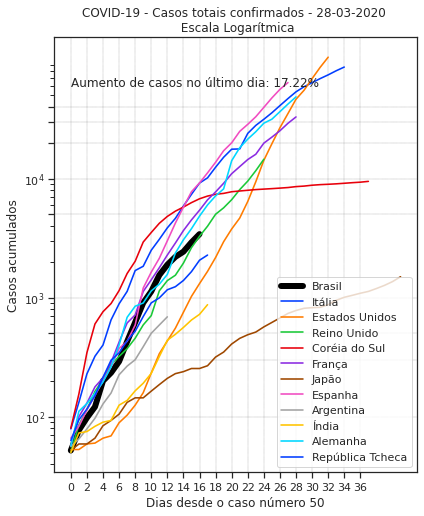

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.yscale('log')


plt.yticks([100,300,500,1000,5000,10000,20000,30000,40000] )
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Casos totais confirmados - {} \n Escala Logarítmica'.format(today))
plt.text(0,60000,texto,fontsize=12)

plt.savefig("plots/03_corona_grafico.png")


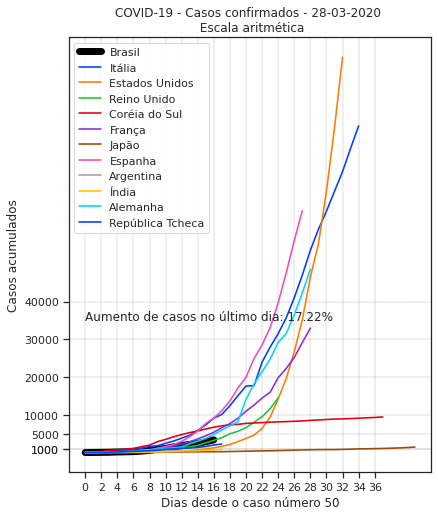

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=7,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.text(0,35000,texto,fontsize=12)

plt.yticks([1000,1000,5000,10000,20000,30000,40000] )
plt.xticks([  0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Casos confirmados - {} \n Escala aritmética'.format(today))

plt.savefig("plots/04_corona_grafico_art.png")



## MORTES ##

## Criando tabelas

In [0]:
mortos = data2[['dateRep','deaths','countriesAndTerritories']]

In [0]:
mgermany = mortos[mortos['countriesAndTerritories']=='Germany']
mgermany.sort_index(ascending=False,inplace=True)
mgermany['Cumulativo'] = mgermany['deaths'].cumsum()
mgermany = mgermany[mgermany['Cumulativo']>=1]
mgermany.reset_index(drop=True, inplace=True)
mgermany.drop(['deaths','dateRep'],axis=1,inplace=True)
mgermany.tail(5)

,countriesAndTerritories,Cumulativo
14,Germany,126
15,Germany,149
16,Germany,198
17,Germany,253
18,Germany,325


In [0]:
mitaly = mortos[mortos['countriesAndTerritories']=='Italy']
mitaly.sort_index(ascending=False,inplace=True)
mitaly['Cumulativo'] = mitaly['deaths'].cumsum()
mitaly = mitaly[mitaly['Cumulativo']>=1]
mitaly.reset_index(drop=True, inplace=True)
mitaly.drop(['deaths','dateRep'],axis=1,inplace=True)
mitaly.tail(5)

,countriesAndTerritories,Cumulativo
30,Italy,6077
31,Italy,6820
32,Italy,7505
33,Italy,8165
34,Italy,9136


In [0]:
margentina = mortos[mortos['countriesAndTerritories']=='Argentina']
margentina.sort_index(ascending=False,inplace=True)
margentina['Cumulativo'] = margentina['deaths'].cumsum()
margentina = margentina[margentina['Cumulativo']>=1]
margentina.reset_index(drop=True, inplace=True)
margentina.drop(['deaths','dateRep'],axis=1,inplace=True)
margentina.tail(5)

,countriesAndTerritories,Cumulativo
14,Argentina,4
15,Argentina,6
16,Argentina,8
17,Argentina,12
18,Argentina,17


In [0]:
mbrazil = mortos[mortos['countriesAndTerritories']=='Brazil']
mbrazil.sort_index(ascending=False,inplace=True)
mbrazil['Cumulativo'] = mbrazil['deaths'].cumsum()
mbrazil = mbrazil[mbrazil['Cumulativo']>=1]
mbrazil.reset_index(drop=True, inplace=True)
mbrazil.drop(['deaths','dateRep'],axis=1,inplace=True)
mbrazil.tail(5)

,countriesAndTerritories,Cumulativo
6,Brazil,34
7,Brazil,46
8,Brazil,57
9,Brazil,77
10,Brazil,92


In [0]:
mjapan = mortos[mortos['countriesAndTerritories']=='Japan']
mjapan.sort_index(ascending=False,inplace=True)
mjapan['Cumulativo'] = mjapan['deaths'].cumsum()
mjapan = mjapan[mjapan['Cumulativo']>=1]
mjapan.reset_index(drop=True, inplace=True)
mjapan.drop(['deaths','dateRep'],axis=1,inplace=True)
mjapan.tail(5)

,countriesAndTerritories,Cumulativo
40,Japan,42
41,Japan,43
42,Japan,45
43,Japan,46
44,Japan,49


In [0]:
msouth_korea = mortos[mortos['countriesAndTerritories']=='South_Korea']
msouth_korea.sort_index(ascending=False,inplace=True)
msouth_korea['Cumulativo'] = msouth_korea['deaths'].cumsum()
msouth_korea = msouth_korea[msouth_korea['Cumulativo']>=1]
msouth_korea.reset_index(drop=True, inplace=True)
msouth_korea.drop(['deaths','dateRep'],axis=1,inplace=True)
msouth_korea.tail(5)

,countriesAndTerritories,Cumulativo
32,South_Korea,120
33,South_Korea,126
34,South_Korea,131
35,South_Korea,139
36,South_Korea,144


In [0]:
mus = mortos[mortos['countriesAndTerritories']=='United_States_of_America']
mus.sort_index(ascending=False,inplace=True)
mus['Cumulativo'] = mus['deaths'].cumsum()
mus = mus[mus['Cumulativo']>=1]
mus.reset_index(drop=True, inplace=True)
mus.drop(['deaths','dateRep'],axis=1,inplace=True)
mus.tail(5)

,countriesAndTerritories,Cumulativo
23,United_States_of_America,590
24,United_States_of_America,801
25,United_States_of_America,1050
26,United_States_of_America,1296
27,United_States_of_America,1707


In [0]:
mfrance = mortos[mortos['countriesAndTerritories']=='France']
mfrance.sort_index(ascending=False,inplace=True)
mfrance['Cumulativo'] = mfrance['deaths'].cumsum()
mfrance = mfrance[mfrance['Cumulativo']>=1]
mfrance.reset_index(drop=True, inplace=True)
mfrance.drop(['deaths','dateRep'],axis=1,inplace=True)
mfrance.tail(5)

,countriesAndTerritories,Cumulativo
38,France,860
39,France,1100
40,France,1331
41,France,1696
42,France,1995


In [0]:
muk = mortos[mortos['countriesAndTerritories']=='United_Kingdom']
muk.sort_index(ascending=False,inplace=True)
muk['Cumulativo'] = muk['deaths'].cumsum()
muk = muk[muk['Cumulativo']>=1]
muk.reset_index(drop=True, inplace=True)
muk.drop(['deaths','dateRep'],axis=1,inplace=True)
muk.tail(5)

,countriesAndTerritories,Cumulativo
18,United_Kingdom,335
19,United_Kingdom,422
20,United_Kingdom,463
21,United_Kingdom,578
22,United_Kingdom,759


In [0]:
mchina = mortos[mortos['countriesAndTerritories']=='China']
mchina.sort_index(ascending=False,inplace=True)
mchina['Cumulativo'] = mchina['deaths'].cumsum()
mchina = mchina[mchina['Cumulativo']>=1]
mchina.reset_index(drop=True, inplace=True)
mchina.drop(['deaths','dateRep'],axis=1,inplace=True)
mchina.head(5)

,countriesAndTerritories,Cumulativo
0,China,1
1,China,1
2,China,1
3,China,1
4,China,2


In [0]:
mspain = mortos[mortos['countriesAndTerritories']=='Spain']
mspain.sort_index(ascending=False,inplace=True)
mspain['Cumulativo'] = mspain['deaths'].cumsum()
mspain = mspain[mspain['Cumulativo']>=1]
mspain.reset_index(drop=True, inplace=True)
mspain.drop(['deaths','dateRep'],axis=1,inplace=True)
mspain.head(5)

,countriesAndTerritories,Cumulativo
0,Spain,1
1,Spain,3
2,Spain,5
3,Spain,5
4,Spain,5


In [0]:
mindia = mortos[mortos['countriesAndTerritories']=='India']
mindia.sort_index(ascending=False,inplace=True)
mindia['Cumulativo'] = mindia['deaths'].cumsum()
mindia = mindia[mindia['Cumulativo']>=1]
mindia.reset_index(drop=True, inplace=True)
mindia.drop(['deaths','dateRep'],axis=1,inplace=True)
mindia.head(5)

,countriesAndTerritories,Cumulativo
0,India,1
1,India,2
2,India,2
3,India,2
4,India,3


In [0]:
mczech = mortos[mortos['countriesAndTerritories']=='Czech_Republic']
mczech.sort_index(ascending=False,inplace=True)
mczech['Cumulativo'] = mczech['deaths'].cumsum()
mczech = mczech[mczech['Cumulativo']>=1]
mczech.reset_index(drop=True, inplace=True)
mczech.drop(['deaths','dateRep'],axis=1,inplace=True)
mczech.tail(5)

,countriesAndTerritories,Cumulativo
1,Czech_Republic,1
2,Czech_Republic,3
3,Czech_Republic,6
4,Czech_Republic,9
5,Czech_Republic,9


## Tabela final de mortes

In [0]:
mfinal_data=pd.concat([mbrazil,mitaly,mjapan,muk,mus,msouth_korea,mfrance,mchina,mspain,margentina,mindia,mgermany,mczech],axis=0)
mfinal_data['Dias']=mfinal_data.index
mfinal_data.columns = ['Países e territórios','Mortes', 'Dias desde a primeira morte']


In [0]:
mzoom = mfinal_data[mfinal_data['Mortes']<=100]

In [0]:
mmeio_zoom = mfinal_data[mfinal_data['Mortes']<=500]

## Gráficos de mortes

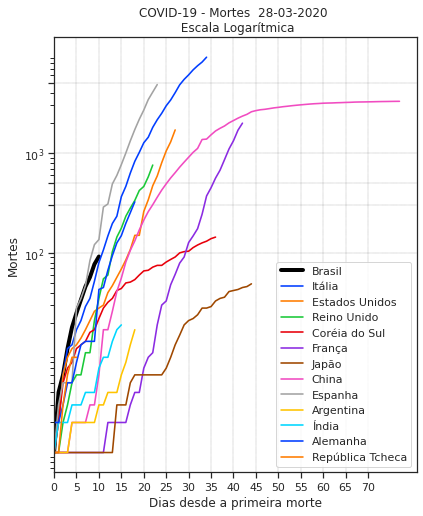

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='China'],label='China')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlim(70)

plt.yscale('log')
plt.yticks([100,300,500,1000,5000] )
plt.xticks([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
plt.title('COVID-19 - Mortes  {} \n Escala Logarítmica'.format(today))

plt.savefig("plots/09_mortes_corona_grafico.png")

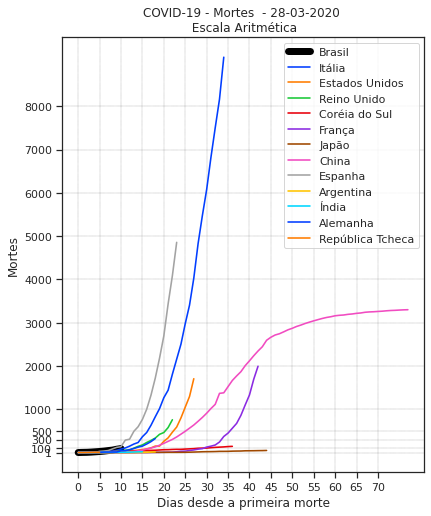

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Brazil'],color='black',linewidth=7,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='China'],label='China')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')

plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([1,100,300,500,1000,2000,3000,4000,5000,6000,7000,8000] )
plt.xticks([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
plt.title('COVID-19 - Mortes  - {} \n Escala Aritmética'.format(today))

plt.savefig("plots/10_mortes_corona_grafico_art.png")

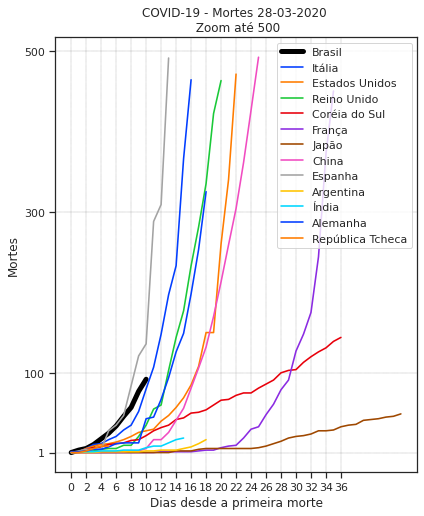

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Brazil'],color='black',linewidth=5,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='China'],label='China')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([1,100,300,500] )
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Mortes {} \n Zoom até 500'.format(today))
plt.savefig("plots/08_mortes_corona_grafico_meiozoom.png")

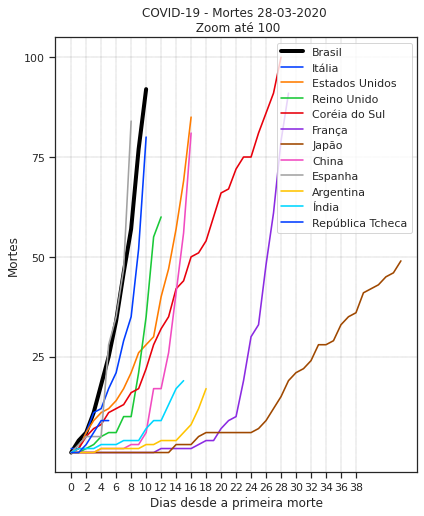

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='China'],label='China')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([25,50,75,100])
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,34, 36, 38])
plt.title('COVID-19 - Mortes {} \n Zoom até 100'.format(today))
plt.savefig("plots/05_mortes_corona_grafico_zoom.png")

## Curva percentual

In [0]:
brazil['razao']= brazil['Cumulativo'].pct_change()
brazil['razao']=(brazil['razao']*100).round(2)
brazil['dias']= brazil.index
brazil

,countriesAndTerritories,Cumulativo,Relativo,razao,dias
0,Brazil,52,0.002484,NaN,0
1,Brazil,77,0.003679,48.08,1
2,Brazil,98,0.004682,27.27,2
3,Brazil,121,0.005781,23.47,3
4,Brazil,200,0.009556,65.29,4
5,Brazil,234,0.011180,17.00,5
6,Brazil,291,0.013903,24.36,6
7,Brazil,428,0.020449,47.08,7
8,Brazil,621,0.029670,45.09,8
9,Brazil,904,0.043192,45.57,9


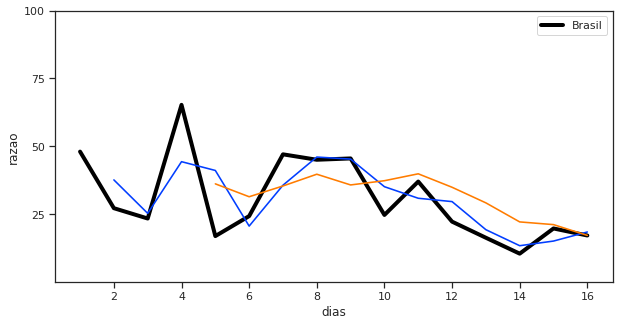

In [0]:
plt.figure(figsize=(10,5))
plt.yticks([25,50,75,100])
plt.ylim(0,100)
sns.lineplot(x='dias',y='razao',data=brazil,color='black',linewidth=4,label='Brasil')
plt.plot(brazil['razao'].rolling(2).mean(),label= 'MA 2 days')
plt.plot(brazil['razao'].rolling(5).mean(),label= 'MA 5 days')

plt.savefig("plots/pct_change.png")


## Letalidade

In [0]:
let_brazil =((mbrazil['Cumulativo'].values[-1]/brazil['Cumulativo'].values[-1])*100).round(2)
let_us = ((mus['Cumulativo'].values[-1]/us['Cumulativo'].values[-1])*100).round(2)
let_uk = ((muk['Cumulativo'].values[-1]/uk['Cumulativo'].values[-1])*100).round(2)
let_italy = ((mitaly['Cumulativo'].values[-1]/italy['Cumulativo'].values[-1])*100).round(2)
let_spain = ((mspain['Cumulativo'].values[-1]/spain['Cumulativo'].values[-1])*100).round(2)
let_japan = ((mjapan['Cumulativo'].values[-1]/japan['Cumulativo'].values[-1])*100).round(2)
let_arg = ((margentina['Cumulativo'].values[-1]/argentina['Cumulativo'].values[-1])*100).round(2)
let_fran = ((mfrance['Cumulativo'].values[-1]/france['Cumulativo'].values[-1])*100).round(2)
let_ind = ((mindia['Cumulativo'].values[-1]/india['Cumulativo'].values[-1])*100).round(2)
let_ger = ((mgermany['Cumulativo'].values[-1]/germany['Cumulativo'].values[-1])*100).round(2)
let_rc = ((mczech['Cumulativo'].values[-1]/czech_Republic['Cumulativo'].values[-1])*100).round(2)


let= [let_brazil,let_us,let_uk,let_italy,let_spain,let_fran,let_japan,let_arg,let_ind,let_ger,let_rc]
paises = ['Brasil','EUA', 'Reino Unido','Itália','Espanha','France','Japão','Argentina','Índia','Alemanha','República Tcheca']



In [0]:
letality = pd.DataFrame()
letality['Países'] = paises
letality['Letalidade %'] = let
letality


,Países,Letalidade %
0,Brasil,2.69
1,EUA,1.63
2,Reino Unido,5.22
3,Itália,10.56
4,Espanha,7.58
5,France,6.05
6,Japão,3.27
7,Argentina,2.46
8,Índia,2.18
9,Alemanha,0.67


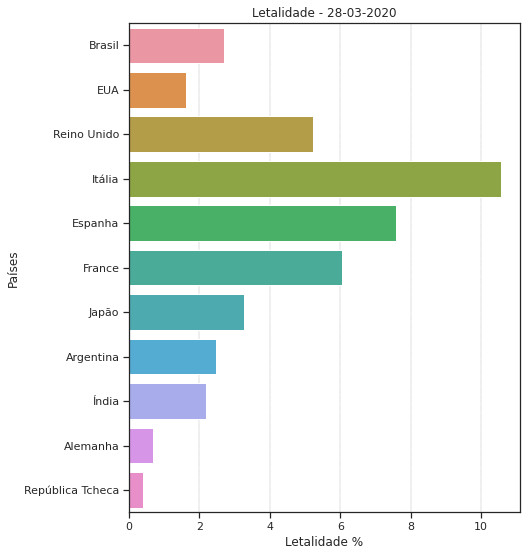

In [0]:
plt.figure(figsize=(7,9))
plt.ylim(0,10)
plt.title("Letalidade - {}".format(today))
sns.barplot(letality['Letalidade %'],letality['Países'])
plt.grid(axis="x",color='black', linestyle='--', linewidth=0.17)
plt.savefig("plots/11_letalidade.png")


## Casos (abordagem relativa)

([<matplotlib.axis.XTick at 0x7f3e0287bda0>,
 <a list of 19 Text major ticklabel objects>)

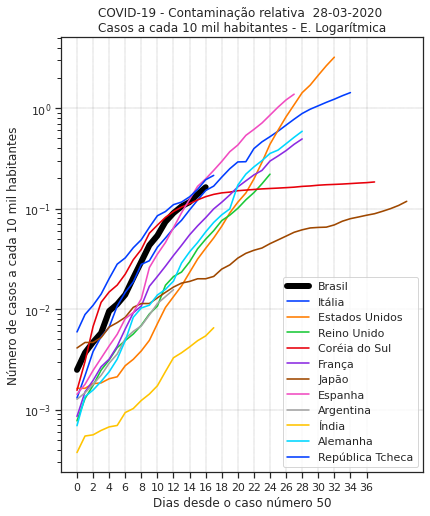

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')

plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.ylabel('Número de casos a cada 10 mil habitantes')
plt.title('COVID-19 - Contaminação relativa  {} \nCasos a cada 10 mil habitantes - E. Logarítmica'.format(today))
plt.yscale('log')
plt.savefig("plots/05_relativa_exponencial.png")

#plt.ylim(0,np.power(1,-16))
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])



([<matplotlib.axis.XTick at 0x7f3e02652ef0>,
 <a list of 19 Text major ticklabel objects>)

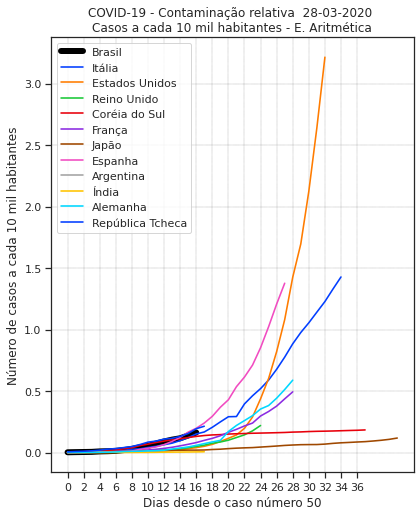

In [0]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.ylabel('Número de casos a cada 10 mil habitantes')
plt.title('COVID-19 - Contaminação relativa  {} \nCasos a cada 10 mil habitantes - E. Aritmética' .format(today))
plt.savefig("plots/06_relativa_aritmetica.png")

plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])


In [0]:
import plotly.express as px

fig = px.line(final_data, x="Dias desde o caso número 50", y="Relativa", color='Países e territórios',labels='Países e territórios',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas dos estados brasileiros", animation_frame="Dias desde o caso número 50")
fig.update_layout( yaxis_type="log")

fig.show()
fig.write_html("plots/11_letalidade.html")

In [0]:
mfinal_data

,Países e territórios,Mortes,Dias desde a primeira morte
0,Brazil,1,0
1,Brazil,4,1
2,Brazil,6,2
3,Brazil,11,3
4,Brazil,18,4
...,...,...,...
1,Czech_Republic,1,1
2,Czech_Republic,3,2
3,Czech_Republic,6,3
4,Czech_Republic,9,4


TypeError: ignored

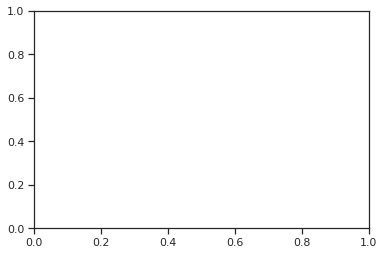

In [0]:
plt.plot(x=mfinal_data['Mortes'][mfinal_data['Dias desde a primeira morte']-7],y='Mortes',hue='Países e territórios',data=mfinal_data)

In [0]:
italy
x = italy.shift(-7)
x.head(4)

,countriesAndTerritories,Cumulativo,Relativo
0,Italy,1128.0,0.018617
1,Italy,1689.0,0.027876
2,Italy,1835.0,0.030286
3,Italy,2502.0,0.041294


In [0]:
italy.head(4)

,countriesAndTerritories,Cumulativo,Relativo
0,Italy,79,0.001304
1,Italy,132,0.002179
2,Italy,229,0.003780
3,Italy,322,0.005314


In [0]:
italy['Shifted'] = x['Cumulativo']

In [0]:
italy.head(10)

,countriesAndTerritories,Cumulativo,Relativo,Shifted
0,Italy,79,0.001304,1128.0
1,Italy,132,0.002179,1689.0
2,Italy,229,0.003780,1835.0
3,Italy,322,0.005314,2502.0
4,Italy,400,0.006602,3089.0
5,Italy,650,0.010728,3858.0
6,Italy,888,0.014656,4636.0
7,Italy,1128,0.018617,5883.0
8,Italy,1689,0.027876,7375.0
9,Italy,1835,0.030286,9172.0


In [0]:
italy.tail(5)

,countriesAndTerritories,Cumulativo,Relativo,Shifted
30,Italy,63927,1.055075,NaN
31,Italy,69176,1.141707,NaN
32,Italy,74386,1.227694,NaN
33,Italy,80539,1.329246,NaN
34,Italy,86498,1.427595,NaN


In [0]:
x = np.arange(1,34,7)
x


array([ 1,  8, 15, 22, 29])

In [0]:
italyweek = pd.DataFrame()



In [0]:
italyweek = []

for i in x:
  y = italy[italy.index==i]
  italyweek.append(y)
italy_week = pd.concat(italyweek)

In [0]:
italy_week

,countriesAndTerritories,Cumulativo,Relativo,Shifted
1,Italy,132,0.002179,1689.0
8,Italy,1689,0.027876,7375.0
15,Italy,7375,0.121720,23980.0
22,Italy,23980,0.395775,59138.0
29,Italy,59138,0.976036,NaN


In [0]:
italy1 = italy[italy.index==1]
italy2 = italy[italy.index==2]


In [0]:
italy_x = pd.concat((italy1,italy2),axis=0)

In [0]:
italy_x

,countriesAndTerritories,Cumulativo,Relativo,Shifted
1,Italy,132,0.002179,1689.0
2,Italy,229,0.003780,1835.0


In [0]:
lista = final_data['Países e territórios'].unique()
lista

array(['Brazil', 'Italy', 'Japan', 'United_Kingdom',
       'United_States_of_America', 'France', 'South_Korea', 'Spain',
       'Argentina', 'India', 'Mexico', 'Germany', 'Czech_Republic'],
      dtype=object)

In [0]:
teste = []
for x in lista:
  globals()['tabela%s' % x] = 'Hello'


In [0]:
tabelaItaly

'Hello'